In [2]:
import matplotlib.pyplot as plt
import numpy as np

Standard deviation in components of total momentum is [2.05366588e-13 1.93600692e-11 2.62939753e-11]


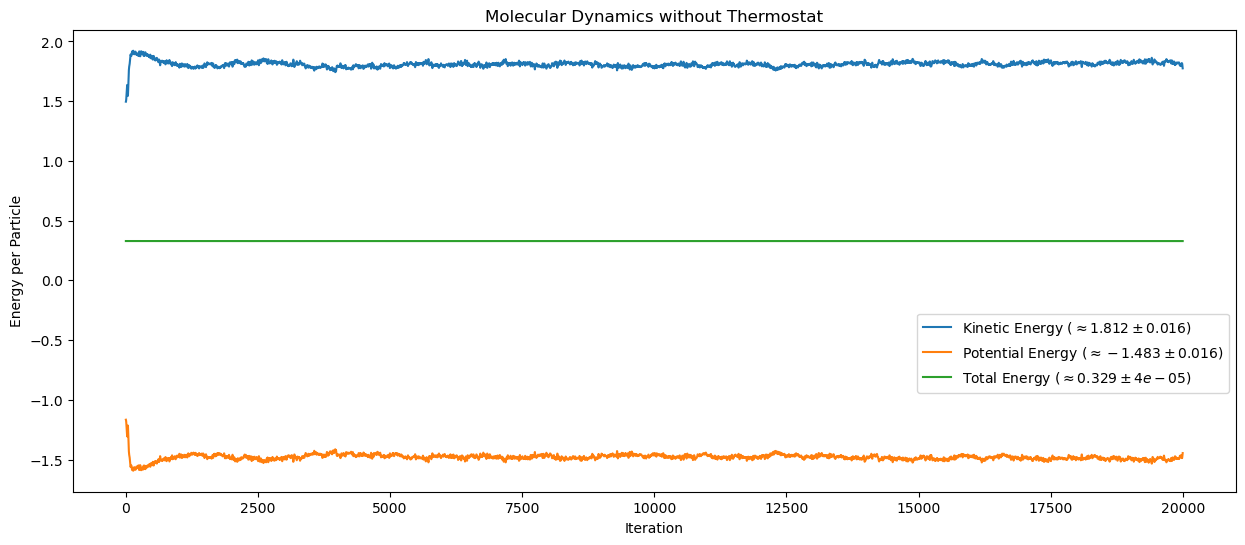

In [3]:
KE = np.loadtxt('data/2/KE.dat') / 2197
PE = np.loadtxt('data/2/PE.dat') / 2197
E = KE + PE
momentum = np.loadtxt('data/2/momentum.dat')

print(f"Standard deviation in components of total momentum is {np.std(momentum, 0)}")

plt.figure(figsize=(15, 6))
plt.plot(KE)
plt.plot(PE)
plt.plot(E)
plt.xlabel("Iteration")
plt.ylabel("Energy per Particle")
plt.legend([
    f'Kinetic Energy ($\\approx {round(np.average(KE[10000:]), 3)} \pm {round(np.std(KE[10000:]), 3)}$)',
    f'Potential Energy ($\\approx {round(np.average(PE[10000:]), 3)} \pm {round(np.std(PE[10000:]), 3)}$)',
    f'Total Energy ($\\approx {round(np.average(E), 3)} \pm {round(np.std(E), 5)}$)'
    ], loc="center right", bbox_to_anchor=(1,0.3))
plt.title(f"Molecular Dynamics without Thermostat")
plt.show()

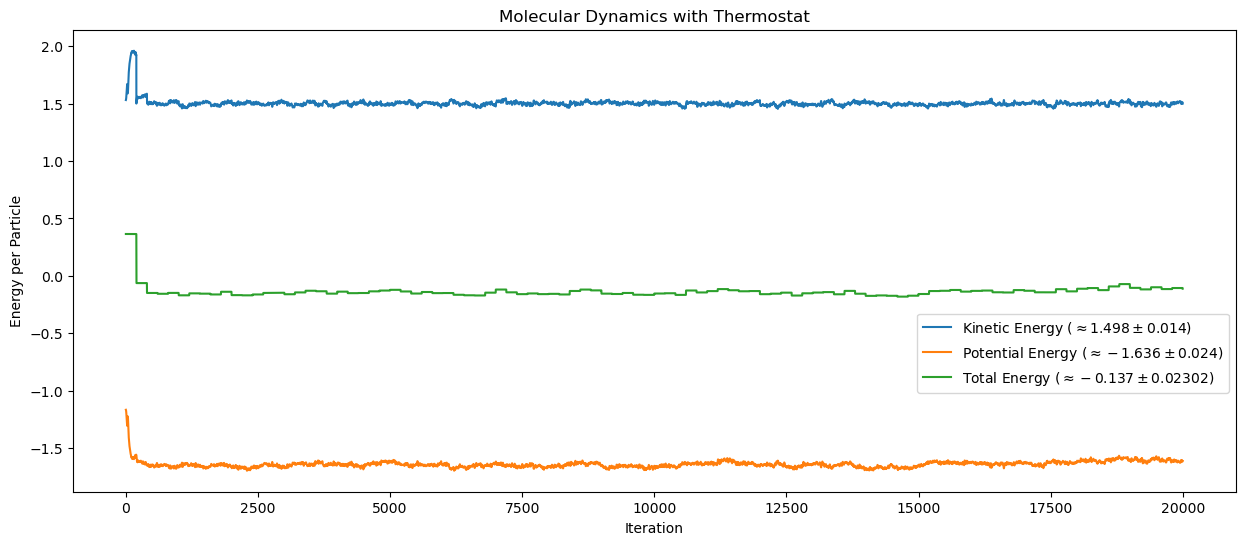

In [4]:
KE = np.loadtxt('data/3/KE.dat') / 2197
PE = np.loadtxt('data/3/PE.dat') / 2197
E = KE + PE

plt.figure(figsize=(15, 6))
plt.plot(KE)
plt.plot(PE)
plt.plot(E)
plt.xlabel("Iteration")
plt.ylabel("Energy per Particle")
plt.legend([
    f'Kinetic Energy ($\\approx {round(np.average(KE[10000:]), 3)} \pm {round(np.std(KE[10000:]), 3)}$)',
    f'Potential Energy ($\\approx {round(np.average(PE[10000:]), 3)} \pm {round(np.std(PE[10000:]), 3)}$)',
    f'Total Energy ($\\approx {round(np.average(E[10000:]), 3)} \pm {round(np.std(E[10000:]), 5)}$)'
    ], loc="center right", bbox_to_anchor=(1,0.3))
plt.title(f"Molecular Dynamics with Thermostat")
plt.show()

In [5]:
dr = 0.02
dv = 0.02

n_max = [np.loadtxt(f'data/{i}/n_max.dat') for i in (4, 6, 7)]
g = [np.loadtxt(f'data/{i}/g.dat') for i in (4, 6, 7)]
rho_v = [np.loadtxt(f'data/{i}/rho_v.dat') / dv for i in (4, 6, 7)]

legend = ["1200 Particles", "2400 Particles", "3600 Particles"]

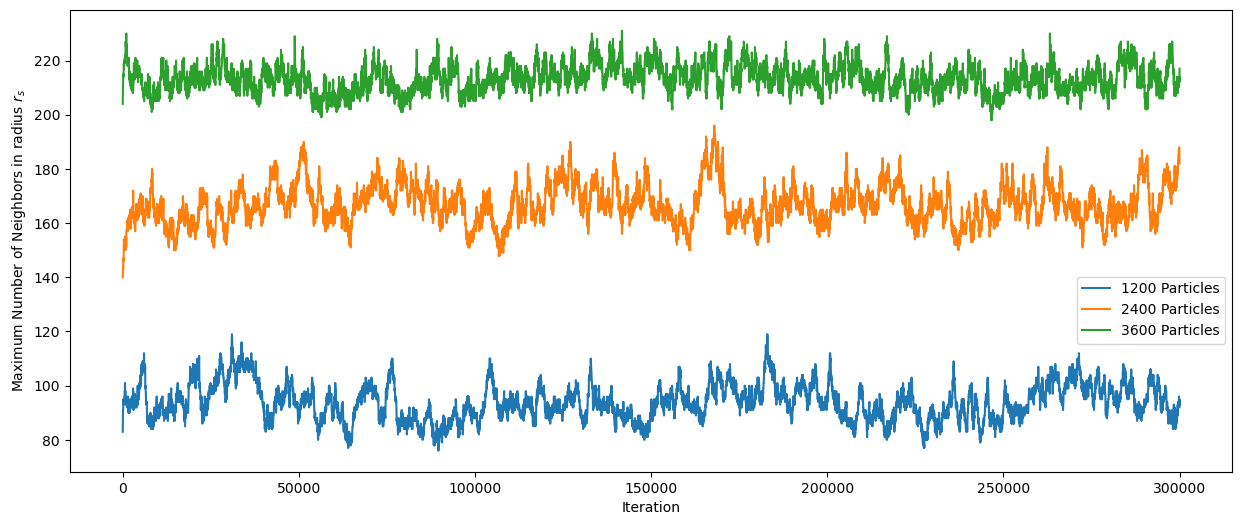

In [6]:
plt.figure(figsize=(15, 6))

for i in (0, 1, 2):
    plt.plot(40 * np.arange(1, len(n_max[i]) + 1), n_max[i])

plt.xlabel("Iteration")
plt.ylabel("Maximum Number of Neighbors in radius $r_s$")
plt.legend(legend, loc="center right", bbox_to_anchor=(1, 0.35))
plt.show()

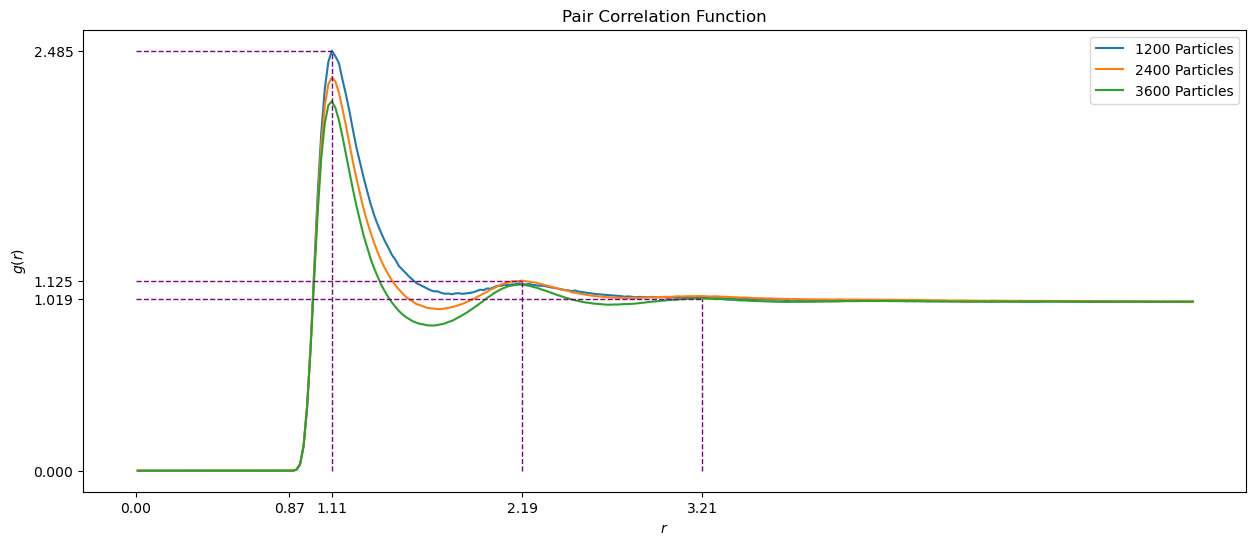

In [7]:
plt.figure(figsize=(15, 6))

r = dr / 2 + np.arange(0, dr * len(g[i]), dr)

def find_maxima(array):
    n = len(array)
    maximas = []
    for i in range(2, n - 1):
        if array[i - 1] < array[i] and array[i] > array[i + 1]:
            maximas.append([i, array[i]])
    maximas.sort(key=lambda t: t[1], reverse=True)
    return maximas

def first_non_zero(array):
    i = 0
    while array[i] == 0:
        i += 1
    return i

i1, h1 = find_maxima(g[0])[0]
i2, h2 = find_maxima(g[1])[1]
i3, h3 = find_maxima(g[2])[2]

x = [r[i1], r[i2], r[i3]]
h = [h1, h2, h3]

for i in (0, 1, 2):
    plt.plot(r, g[i])

plt.vlines(x=x, ymin=[0, 0, 0], ymax=h, colors='purple', ls='--', lw=1)
plt.xticks(x + [0, r[first_non_zero(g[2])]])
plt.hlines(y=h, xmin=[0, 0, 0], xmax=x, colors='purple', ls='--', lw=1)
plt.yticks(h + [0])
plt.xlabel("$r$")
plt.ylabel("$g(r)$")
plt.title("Pair Correlation Function")
plt.legend(legend)
plt.show()

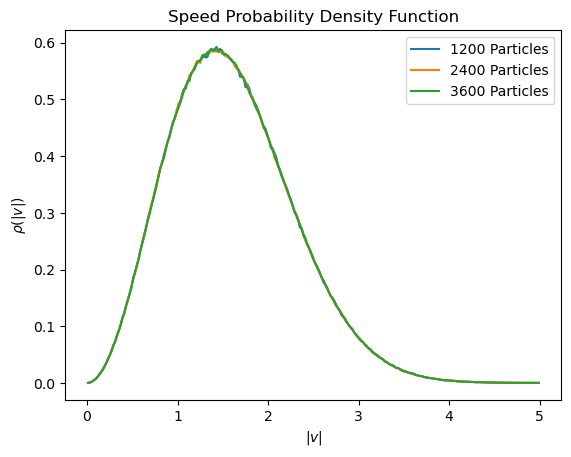

In [8]:
v = dv / 2 + np.arange(0, dv * len(rho_v[i]), dv)

for i in (0, 1, 2):
    plt.plot(v, rho_v[i])

plt.xlabel("$|v|$")
plt.ylabel("$\\rho(|v|)$")
plt.title("Speed Probability Density Function")
plt.legend(legend)
plt.show()

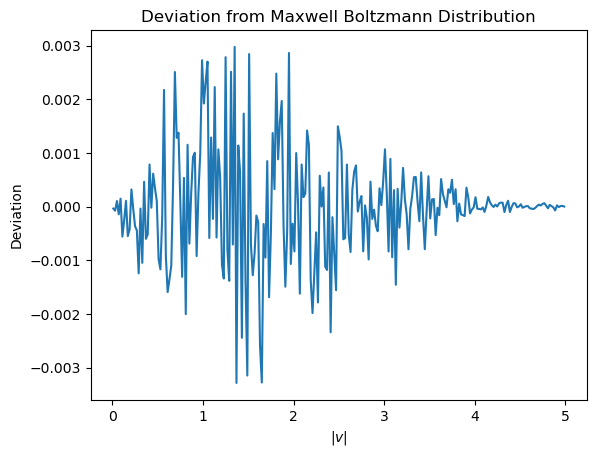

In [16]:
def mb(v):
    return 4 * np.pi * v**2 * (2 * np.pi)**(-1.5) * np.exp(- v**2 / 2)

plt.plot(v, mb(v) - rho_v[2])
plt.xlabel("$|v|$")
plt.ylabel("Deviation")
plt.title("Deviation from Maxwell Boltzmann Distribution")
plt.show()

0.002663905121064246

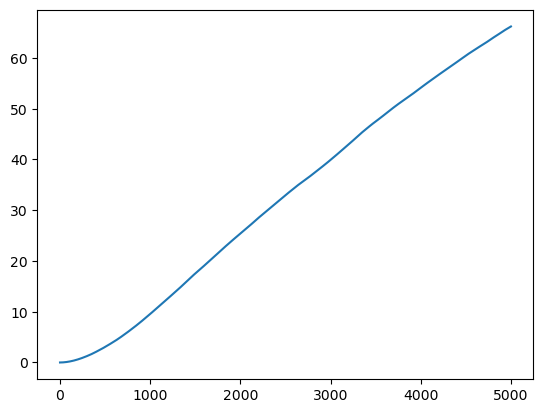

In [35]:
d = np.loadtxt('data/diffusion/d.dat')
plt.plot(d)

x = np.arange(len(d))

m, b = np.polyfit(x[1000:2000], d[1000:2000], 1)

m / 6